<a href="https://colab.research.google.com/github/mafer-saes01/ProyectoInferencia/blob/main/Proyecto_Inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO INFERENCIA: Análisis de Desapariciones en Jalisco**

In [ ]:
#Equipo: María Fernanda Saavedra Espinosa, Leonel José Evans González, Erick Alberto Nicolás Palos
#Fecha de entrega: 04/12/2023
#Breve descripción: El siguiente programa de python realiza un analisis de la base
#de datos del gobierno mexicano "RNPEDFC" para encontrar la relación que hay entre
#las desapariciones que han sucedido en México durante 50 años (1968-2018).
#Esto se logra a través de la limpieza y análisis de datos para finalmente
#crear grupos de personas que desaparecieron con las mismas características.

In [ ]:
!pip install kneed #Se instala la biblioteca kneed para poder realizar el método del codo

In [ ]:
#Se importan las bibliotecas necesarias para el proyecto

#Bibliotecas básicas
import io
import pandas as pd
import numpy as np
import math

#Bibliotecas para graficar
import seaborn as sns #Para hacer gráficas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from ipywidgets import interact
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
from IPython.display import clear_output

#Bibliotecas para el manejo de datos de horas y tiempos
from datetime import timedelta
import datetime

#Bibliotecas para realizar el clustering y agrupamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn import preprocessing
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Bibliotecas para exportar algún df
from google.colab import files

#Bibliotecas para hacer ttest
from scipy.stats import ttest_ind

In [ ]:
#Se importa el dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargamos el archivo desde google drive
from google.colab import drive
from google.colab import files
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Se realiza el dataframe con el dataset
desapariciones_df = pd.read_csv('/content/gdrive/MyDrive/Inferencia/Proyecto/RNPEDFC.csv', encoding='latin-1')
desapariciones_df['fuero']= 1
desapariciones_df

,Unnamed: 0,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,fuero
0,1,18/03/2012,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA,1
1,2,05/02/2007,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,1
2,3,14/03/2009,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,1
3,4,23/12/2006,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,1
4,5,11/01/2008,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36260,36261,26/04/2018,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA,1
36261,36262,08/01/2018,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NO ESPECIFICADO,NINGUNO,PGJ - COLIMA,1
36262,36263,02/02/2015,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA,1
36263,36264,22/08/2017,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA,1


In [ ]:
federal_df = pd.read_csv('/content/gdrive/MyDrive/Inferencia/Proyecto/Federal.csv', encoding='latin-1')
federal_df['fuero']= 2
federal_df

,Unnamed: 0,Fecha,Pais,Entidad,Clave de entidad,Municipio,Pais de nacimiento,Nacionalidad,Sexo,Edad,Tipo de Lugar,Autoridad que recibio la denuncia,Fecha de la denuncia,Entidad donde se recibio la denuncia,fuero
0,1,26/09/2014,MÉXICO,GUERRERO,12,IGUALA DE LA INDEPENDENCIA,MÉXICO,MÉXICO,HOMBRE,17,VÍA PÚBLICA,SDHPDSC/OICI,09/11/2015,CIUDAD DE MÉXICO,2
1,2,26/09/2014,MÉXICO,GUERRERO,12,IGUALA DE LA INDEPENDENCIA,MÉXICO,MÉXICO,HOMBRE,24,VÍA PÚBLICA,SDHPDSC/OICI,09/11/2015,CIUDAD DE MÉXICO,2
2,3,05/03/2014,MÉXICO,GUERRERO,12,IGUALA DE LA INDEPENDENCIA,MÉXICO,MÉXICO,HOMBRE,20,DESCONOCIDO,SDHPDSC/FEBPD,11/07/2017,CIUDAD DE MÉXICO,2
3,4,20/12/2016,MÉXICO,DURANGO,10,DURANGO,MÉXICO,MÉXICO,HOMBRE,NO DISPONIBLE,CASA HABITACIÓN,SDHPDSC/FEIDDF,08/03/2018,CIUDAD DE MÉXICO,2
4,5,25/09/2016,MÉXICO,GUERRERO,12,PETATLÁN,MÉXICO,MÉXICO,HOMBRE,25,VÍA PÚBLICA,SEIDO/UEIDCS,06/04/2017,CIUDAD DE MÉXICO,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1166,14/12/2012,MÉXICO,JALISCO,14,LA BARCA,MÉXICO,MÉXICO,HOMBRE,41,DESCONOCIDO,SDHPDSC/UEBPD,20/03/2014,CIUDAD DE MÉXICO,2
1166,1167,07/11/2017,MÉXICO,TAMAULIPAS,28,NUEVO LAREDO,MÉXICO,MÉXICO,HOMBRE,32,VÍA PÚBLICA,TAMAULIPAS/NUEVO LAREDO,19/02/2018,TAMAULIPAS,2
1167,1168,28/01/2015,MÉXICO,CIUDAD DE MÉXICO,9,VENUSTIANO CARRANZA,GUATEMALA,GUATEMALA,HOMBRE,52,DESCONOCIDO,SDHPDSC/UIDPM,19/02/2015,CIUDAD DE MÉXICO,2
1168,1169,05/11/2011,MÉXICO,VERACRUZ DE IGNACIO DE LA LLAVE,30,BANDERILLA,MÉXICO,MÉXICO,HOMBRE,NO DISPONIBLE,VÍA PÚBLICA,SDHPDSC/FEBPD,17/06/2016,CIUDAD DE MÉXICO,2


In [ ]:
#concatenamos las bases de datos
ff_fc = pd.concat([desapariciones_df, federal_df], ignore_index=True)
ff_fc

,Unnamed: 0,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,...,Etnia,Discapacidad,Dependencia que envio la informacion,fuero,Clave de entidad,Pais de nacimiento,Tipo de Lugar,Autoridad que recibio la denuncia,Fecha de la denuncia,Entidad donde se recibio la denuncia
0,1,18/03/2012,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,...,NO ESPECIFICADO,NINGUNO,FGE - SONORA,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,05/02/2007,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,...,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,1,NaN,NaN,NaN,NaN,NaN,NaN
2,3,14/03/2009,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,...,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4,23/12/2006,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,...,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,1,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11/01/2008,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,...,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37430,1166,14/12/2012,NaN,MÉXICO,JALISCO,LA BARCA,NaN,MÉXICO,NaN,NaN,...,NaN,NaN,NaN,2,14.0,MÉXICO,DESCONOCIDO,SDHPDSC/UEBPD,20/03/2014,CIUDAD DE MÉXICO
37431,1167,07/11/2017,NaN,MÉXICO,TAMAULIPAS,NUEVO LAREDO,NaN,MÉXICO,NaN,NaN,...,NaN,NaN,NaN,2,28.0,MÉXICO,VÍA PÚBLICA,TAMAULIPAS/NUEVO LAREDO,19/02/2018,TAMAULIPAS
37432,1168,28/01/2015,NaN,MÉXICO,CIUDAD DE MÉXICO,VENUSTIANO CARRANZA,NaN,GUATEMALA,NaN,NaN,...,NaN,NaN,NaN,2,9.0,GUATEMALA,DESCONOCIDO,SDHPDSC/UIDPM,19/02/2015,CIUDAD DE MÉXICO
37433,1169,05/11/2011,NaN,MÉXICO,VERACRUZ DE IGNACIO DE LA LLAVE,BANDERILLA,NaN,MÉXICO,NaN,NaN,...,NaN,NaN,NaN,2,30.0,MÉXICO,VÍA PÚBLICA,SDHPDSC/FEBPD,17/06/2016,CIUDAD DE MÉXICO


In [ ]:
ff_fc['Municipio'] = ff_fc['Municipio'].fillna('NO DISPONIBLE')

In [ ]:
fuero = ff_fc.dropna(axis=1)
fuero

,Unnamed: 0,Fecha,Pais,Entidad,Municipio,Nacionalidad,Sexo,Edad,fuero
0,1,18/03/2012,MEXICO,SONORA,NAVOJOA,MEXICANA,MUJER,7,1
1,2,05/02/2007,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,MEXICANA,MUJER,4,1
2,3,14/03/2009,MEXICO,ESTADO DE MEXICO,CHALCO,MEXICANA,HOMBRE,6,1
3,4,23/12/2006,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,MEXICANA,HOMBRE,10,1
4,5,11/01/2008,MEXICO,ESTADO DE MEXICO,TOLUCA,MEXICANA,HOMBRE,4,1
...,...,...,...,...,...,...,...,...,...
37430,1166,14/12/2012,MÉXICO,JALISCO,LA BARCA,MÉXICO,HOMBRE,41,2
37431,1167,07/11/2017,MÉXICO,TAMAULIPAS,NUEVO LAREDO,MÉXICO,HOMBRE,32,2
37432,1168,28/01/2015,MÉXICO,CIUDAD DE MÉXICO,VENUSTIANO CARRANZA,GUATEMALA,HOMBRE,52,2
37433,1169,05/11/2011,MÉXICO,VERACRUZ DE IGNACIO DE LA LLAVE,BANDERILLA,MÉXICO,HOMBRE,NO DISPONIBLE,2


# Contexto

In [ ]:
def grafica_df(seleccionado):
    if seleccionado == 'fuero federal':
        df = federal_df
    elif seleccionado == 'fuero común':
        df = desapariciones_df
    elif seleccionado == 'los dos fueros':
        df = fuero
    else:
        raise ValueError("No válido")

    plt.figure(figsize=(14, 15))

    ax = sns.countplot(x='Entidad', data=df, palette="hls", order=df['Entidad'].value_counts().index)
    _ = plt.xticks(
        rotation=45,
        horizontalalignment='right',
        fontweight='light'
    )

    plt.title('Entidad de Desaparición', fontsize=14)
    plt.ylabel('Numero de Desaparecidos')

    # Calcular el número de desaparecidos para cada categoría
    labels = (df['Entidad'].value_counts())
    # Agregar los números de resultado en el gráfico de barras
    for i, v in enumerate(labels):
        ax.text(i, v + 10, str(v), horizontalalignment='center', size=10, color='black')
    plt.tight_layout()

    # Mostrar la gráfica actual
    plt.show()

# Crear el botón de filtro
boton = widgets.Dropdown(
    options=['fuero federal', 'fuero común', 'los dos fueros'],
    description='Selecciona:'
)

# Crear la función interactiva
interact(grafica_df, seleccionado=boton)


interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal', 'fuero común', 'los dos fu…

<function __main__.grafica_df(seleccionado)>

Como se vio con anterioridad, este dataset menciona que Jalisco no es el estado con mayores incidencias de desapariciones. Sin embargo, se puede asumir que esta diferencia se debe a la **cifra negra** del estado de Jalisco.
Primeramente, esta está compuesta por personas que no denuncian a sus desaparecidos por miedo o porque creen que estos decidieron irse. Pero también se puede decir que esta está conformada por los datos que el gobierno de Jalisco ha evitado introducir en sus reportes para que se pinte que en su gobierno las desapariciones "están disminuyendo".

In [ ]:
#Se compara la cantidad de mujeres desaparecidas contra hombres
def grafica_df(seleccionado):
    if seleccionado == 'fuero federal':
        df = federal_df
    elif seleccionado == 'fuero común':
        df = desapariciones_df
    elif seleccionado == 'los dos fueros':
        df = fuero
    else:
        raise ValueError("No válido")
    mylabels = ["Hombres", "Mujeres"]
    colors = ['#069af3','#ffc0cb']
    plt.pie(df["Sexo"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
    plt.figure(figsize=(14,10))
    plt.show()
# Crear el botón de filtro
boton = widgets.Dropdown(
    options=['fuero federal', 'fuero común', 'los dos fueros'],
    description='Selecciona:'
)

# Crear la función interactiva
interact(grafica_df, seleccionado=boton)


interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal', 'fuero común', 'los dos fu…

<function __main__.grafica_df(seleccionado)>

In [ ]:
dataframes = [federal_df,desapariciones_df,fuero]

# Iterar sobre cada DataFrame en la lista
for df in dataframes:
  # Reemplazar 'NO DISPONIBLE' con NaN en la columna Edad
    df.loc[df["Edad"] == 'NO DISPONIBLE', "Edad"] = np.nan

    # Convertir la columna Edad a tipo float, ignorando posibles errores
    df["Edad"] = pd.to_numeric(df["Edad"], errors='coerce')

<ipython-input-13-78fe78d88cc4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Edad"] = pd.to_numeric(df["Edad"], errors='coerce')


In [ ]:
def grafica_df(seleccionado):
    # Seleccionar el DataFrame según la opción
    if seleccionado == 'fuero federal':
        df = federal_df
    elif seleccionado == 'fuero común':
        df = desapariciones_df
    elif seleccionado == 'los dos fueros':
        df = fuero
    else:
        raise ValueError("No válido")

    # Reemplazar 'NO DISPONIBLE' con NaN en la columna Edad
    df.loc[df["Edad"] == 'NO DISPONIBLE', "Edad"] = np.nan

    # Convertir la columna Edad a tipo float, ignorando posibles errores
    df["Edad"] = pd.to_numeric(df["Edad"], errors='coerce')

    # Configurar el tamaño del gráfico
    plt.figure(figsize=(15, 3))

    # Crear un gráfico de distribución univariante de las edades
    sns.distplot(df[(df["Edad"] > 0)].Edad.dropna(), kde_kws={"lw": 3}, bins=100)

    # Configurar títulos y etiquetas
    plt.title('Distribuciones de edades de desaparecidos', fontsize=14)
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')

    # Ajustar el diseño
    plt.tight_layout()
    plt.show()

# Crear el botón de filtro
boton = widgets.Dropdown(
    options=['fuero federal', 'fuero común', 'los dos fueros'],
    value='fuero federal',
    description='Selecciona:'
)

# Crear la función interactiva
interact(grafica_df, seleccionado=boton)


interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal', 'fuero común', 'los dos fu…

<function __main__.grafica_df(seleccionado)>

**Para correr esta celda y corra correctamente, necesitas haber puesto las tres opciones para generar la gráfica anterior**

In [ ]:
# Se calculan los datos paramétricos para poder analizar el promedio de personas que desaparecen
def distr(seleccionado):
    # Seleccionar el DataFrame según la opción
    if seleccionado == 'fuero federal':
        df = federal_df
    elif seleccionado == 'fuero común':
        df = desapariciones_df
    elif seleccionado == 'los dos fueros':
        df = fuero
    else:
        raise ValueError("No válido")

    # Calcular datos paramétricos
    age_distr = pd.DataFrame(df["Edad"].describe())
    display(age_distr.transpose())

# Crear el widget de dropdown
boton = widgets.Dropdown(
    options=['fuero federal', 'fuero común', 'los dos fueros'],
    value='fuero federal',
    description='Selecciona:'
)

# Crear la función interactiva
interact(distr, seleccionado=boton)

interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal', 'fuero común', 'los dos fu…

<function __main__.distr(seleccionado)>

In [ ]:
def grafica_df(seleccionado):
    # Seleccionar el DataFrame según la opción
    if seleccionado == 'fuero federal':
        df = federal_df
    elif seleccionado == 'fuero común':
        df = desapariciones_df
    elif seleccionado == 'los dos fueros':
        df = fuero
    else:
        raise ValueError("No válido")
    grafica = df[{'Sexo','Edad'}]
    mujeres = grafica.loc[df['Sexo']=='MUJER']
    hombres = grafica.loc[df['Sexo']=='HOMBRE']

    plt.hist(mujeres['Edad'],bins=30,color='pink',alpha=1)
    plt.hist(hombres['Edad'],bins=30,color='lightblue',alpha=0.6)

    plt.xlabel("Edad")
    plt.ylabel("Desaparecidos")
    plt.title("Mujeres y Hombres Desaparecidos por Edad",weight="bold")

    plt.figure(figsize=(15,30))
    plt.show()
# Crear el botón de filtro
boton = widgets.Dropdown(
    options=['fuero federal', 'fuero común', 'los dos fueros'],
    value='fuero federal',
    description='Selecciona:'
)

# Crear la función interactiva
interact(grafica_df, seleccionado=boton)

interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal', 'fuero común', 'los dos fu…

<function __main__.grafica_df(seleccionado)>

**Para correr esta celda y corra correctamente, necesitas haber puesto las tres opciones para generar la gráfica anterior**

In [ ]:
#Debido a que el máximo pareciera ser un outlier, se checa que realmente exista
#esta información en el dataset
# solamente se revisa el maximo del fuero compun debido a que es el mismo máximo que el de los dos fueros y el fuero federal no presenta ningún outlier
desapariciones_df[desapariciones_df["Edad"] >= 100]

,Unnamed: 0,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,fuero
36166,36167,12/12/1997,06:00:00,MEXICO,NUEVO LEON,MONTERREY,MONTERREY,MEXICANA,1.68,MEDIANA,HOMBRE,103.0,"USABA BIGOTE, SIN BARBA,OREJAS GRANDES LOBULO ...",NO ESPECIFICADO,NINGUNO,PGJ - NUEVO LEON,1


# Limpieza del conjunto de datos

## Se convierte el string "NO ESPECIFICADO" en valores nulos para poder mejorar el uso de la base de datos

In [ ]:
dataframes = [desapariciones_df,federal_df,fuero]

# Lista de columnas a verificar y convertir en NaN si es necesario
columnas_a_verificar = [
    "Etnia",
    "Edad",
    "Fecha",
    "Hora",
    "Entidad",
    "Municipio",
    "Localidad",
    "Nacionalidad",
    "Estatura",
    "Complexion",
    "Sexo",
    "Descripcion de senas particulares",
    "Discapacidad",
    "Dependencia que envio la informacion"
]

# Iterar sobre cada DataFrame en la lista
for df in dataframes:
    # Verificar y convertir en NaN para cada columna
    for columna in columnas_a_verificar:
        if columna in df.columns:
            df.loc[df[columna] == "NO ESPECIFICADO", columna] = np.nan

## Se realiza una columna de fecha y hora con el formato DateTime
Esta parte solo se podrá realizar para el fuero común

In [ ]:
#Esta columna tipo datetime se realiza para analizar los meses y días con mayor incidencia
desapariciones_df["Fecha_hora"] = pd.to_datetime(desapariciones_df['Fecha']+" "+desapariciones_df['Hora'], infer_datetime_format=True)


In [ ]:
desapariciones_df.info() #Se analiza cuántos valores faltantes hay en cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36265 entries, 0 to 36264
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            36265 non-null  int64         
 1   Fecha                                 35927 non-null  object        
 2   Hora                                  36249 non-null  object        
 3   Pais                                  36265 non-null  object        
 4   Entidad                               36236 non-null  object        
 5   Municipio                             35597 non-null  object        
 6   Localidad                             32852 non-null  object        
 7   Nacionalidad                          34225 non-null  object        
 8   Estatura                              25258 non-null  object        
 9   Complexion                            25696 non-null  object        
 10

## Borramos los datos de cualquier entidad distinta de Jalisco


In [ ]:
#Como trabajaremos con la entidad de Jalisco, es más conveniente para la eficiencia del manejo de datos
#solo quedarnos con los datos que necesitaremos
jalisco_comun=desapariciones_df[desapariciones_df["Entidad"]=="JALISCO"] #Se realiza el data frame solamente de Jalisco
jalisco_comun


,Unnamed: 0,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,fuero,Fecha_hora
522,523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,1,2006-01-01 12:00:00
1415,1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,1.7,ROBUSTA,HOMBRE,23.0,NaN,NaN,NINGUNO,FGE - PUEBLA,1,2011-07-28 03:00:00
4275,4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,1.8,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,1,2012-08-08 08:00:00
4276,4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,1,2012-08-07 10:30:00
4277,4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,1,2012-08-07 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36186,36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,1,2017-08-10 09:00:00
36191,36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,1,2017-09-25 09:30:00
36238,36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,1,2017-11-17 11:00:00
36239,36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,NaN,NINGUNO,FGE - JALISCO,1,2017-09-23 05:00:00


In [ ]:
#Como trabajaremos con la entidad de Jalisco, es más conveniente para la eficiencia del manejo de datos
#solo quedarnos con los datos que necesitaremos
jalisco_federal=federal_df[federal_df["Entidad"]=="JALISCO"] #Se realiza el data frame solamente de Jalisco
jalisco_federal


,Unnamed: 0,Fecha,Pais,Entidad,Clave de entidad,Municipio,Pais de nacimiento,Nacionalidad,Sexo,Edad,Tipo de Lugar,Autoridad que recibio la denuncia,Fecha de la denuncia,Entidad donde se recibio la denuncia,fuero
100,101,27/03/2014,MÉXICO,JALISCO,14,SAN GABRIEL,MÉXICO,MÉXICO,HOMBRE,26.0,INMUEBLE (OTROS),SEIDO/UEIARV,19/06/2014,CIUDAD DE MÉXICO,2
148,149,25/12/2014,MÉXICO,JALISCO,14,GUADALAJARA,COLOMBIA,COLOMBIA,HOMBRE,44.0,DESCONOCIDO,SDHPDSC/UIDPM,11/11/2016,CIUDAD DE MÉXICO,2
181,182,27/11/2012,MÉXICO,JALISCO,14,ZAPOPAN,MÉXICO,MÉXICO,HOMBRE,37.0,VÍA PÚBLICA,SDHPDSC/UEBPD,25/04/2014,CIUDAD DE MÉXICO,2
186,187,10/02/2018,MÉXICO,JALISCO,14,IXTLAHUACÁN DE LOS MEMBRILLOS,MÉXICO,MÉXICO,HOMBRE,40.0,CASA HABITACIÓN,JALISCO/GUADALAJARA,19/02/2018,JALISCO,2
363,364,01/12/1987,MÉXICO,JALISCO,14,GUADALAJARA,HONDURAS,HONDURAS,HOMBRE,46.0,DESCONOCIDO,SDHPDSC/UIDPM,25/10/2016,CIUDAD DE MÉXICO,2
385,386,27/05/2015,MÉXICO,JALISCO,14,TLAJOMULCO DE ZÚÑIGA,MÉXICO,MÉXICO,HOMBRE,NaN,CASA HABITACIÓN,JALISCO/GUADALAJARA,08/07/2015,JALISCO,2
398,399,01/01/2017,MÉXICO,JALISCO,14,NaN,EL SALVADOR,EL SALVADOR,MUJER,32.0,VÍA PÚBLICA,SDHPDSC/UIDPM,02/04/2018,CIUDAD DE MÉXICO,2
399,400,17/02/2018,MÉXICO,JALISCO,14,TLAJOMULCO DE ZÚÑIGA,MÉXICO,MÉXICO,HOMBRE,NaN,CARRETERA,JALISCO/GUADALAJARA,22/02/2018,JALISCO,2
471,472,14/12/2017,MÉXICO,JALISCO,14,VILLA PURIFICACIÓN,MÉXICO,MÉXICO,HOMBRE,39.0,CASA HABITACIÓN,JALISCO/AUTLÁN,19/02/2018,JALISCO,2
472,473,14/12/2012,MÉXICO,JALISCO,14,LA BARCA,MÉXICO,MÉXICO,HOMBRE,39.0,DESCONOCIDO,SDHPDSC/UEBPD,20/03/2014,CIUDAD DE MÉXICO,2


In [ ]:
#Como trabajaremos con la entidad de Jalisco, es más conveniente para la eficiencia del manejo de datos
#solo quedarnos con los datos que necesitaremos
jalisco=fuero[fuero["Entidad"]=="JALISCO"] #Se realiza el data frame solamente de Jalisco
jalisco

,Unnamed: 0,Fecha,Pais,Entidad,Municipio,Nacionalidad,Sexo,Edad,fuero
522,523,01/01/2006,MEXICO,JALISCO,ZAPOPAN,MEXICANA,HOMBRE,21.0,1
1415,1416,28/07/2011,MEXICO,JALISCO,GUADALAJARA,MEXICANA,HOMBRE,23.0,1
4275,4276,08/08/2012,MEXICO,JALISCO,VALLE DE JUAREZ,MEXICANA,HOMBRE,25.0,1
4276,4277,07/08/2012,MEXICO,JALISCO,MAZAMITLA,MEXICANA,HOMBRE,27.0,1
4277,4278,07/08/2012,MEXICO,JALISCO,MAZAMITLA,MEXICANA,HOMBRE,28.0,1
...,...,...,...,...,...,...,...,...,...
37115,851,02/02/2012,MÉXICO,JALISCO,ZAPOPAN,MÉXICO,HOMBRE,27.0,2
37166,902,30/08/2013,MÉXICO,JALISCO,TLAQUEPAQUE,MÉXICO,HOMBRE,23.0,2
37188,924,04/10/2014,MÉXICO,JALISCO,PONCITLÁN,MÉXICO,HOMBRE,37.0,2
37292,1028,02/07/2012,MÉXICO,JALISCO,ZAPOTLÁN EL GRANDE,MÉXICO,HOMBRE,24.0,2


## Se rellenan los valores faltantes

In [ ]:
# Se determinan los valores faltantes para analizar cómo se van a tratar
jalisco_comun.isna().sum()

Unnamed: 0                                 0
Fecha                                      1
Hora                                       0
Pais                                       0
Entidad                                    0
Municipio                                 48
Localidad                                118
Nacionalidad                               3
Estatura                                 208
Complexion                               142
Sexo                                       0
Edad                                      34
Descripcion de senas particulares        850
Etnia                                   3347
Discapacidad                              82
Dependencia que envio la informacion       0
fuero                                      0
Fecha_hora                                 1
dtype: int64

In [ ]:
#Se cambian los valores faltantes de estas variables con su valor promedio
#para que no afecten el análisis de datos.
#Esto debido a que no se quieren eliminar filas que tienen información importante
#en sus otras columnas y la moda podría hacer que un número tenga mayor peso del que
#debería tener.

#Se cambian los valores de los datos de estatura por su promedio.
jalisco_comun["Estatura"] = jalisco_comun["Estatura"].astype(float)
jalisco_comun["Estatura"] = jalisco_comun["Estatura"].fillna(jalisco_comun["Estatura"].mean())

dataframes = [desapariciones_df,federal_df,fuero]

# Iterar sobre cada DataFrame en la lista
for df in dataframes:
  #Se cambia los valores de los datos de edades
  df["Edad"] = df["Edad"].astype(float)
  df["Edad"] = df["Edad"].fillna(df["Edad"].mean())

<ipython-input-25-d0af1b9f8e96>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jalisco_comun["Estatura"] = jalisco_comun["Estatura"].astype(float)
<ipython-input-25-d0af1b9f8e96>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jalisco_comun["Estatura"] = jalisco_comun["Estatura"].fillna(jalisco_comun["Estatura"].mean())
<ipython-input-25-d0af1b9f8e96>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
#Se saca la moda de los municipios para el cambio de variables
jalisco['Municipio'].mode()
print(jalisco['Municipio'].mode())
print(jalisco_comun['Municipio'].mode())
print(jalisco_federal['Municipio'].mode())

0    GUADALAJARA
Name: Municipio, dtype: object
0    GUADALAJARA
Name: Municipio, dtype: object
0    ZAPOPAN
Name: Municipio, dtype: object


In [ ]:
#Debido a que no se puede sacar el promedio de la columna, se utiliza la moda
#de la columna 'Municipio' debido a que, como la mayoría de las
#personas desaparecen en dicho lugar, lo más probable es que los NO ESPECIFICADOS
#hayan desaparecido en este.

dataframes = [jalisco_federal,jalisco_comun,jalisco]

# Iterar sobre cada DataFrame en la lista
for df in dataframes:
  #Se cambia los valores de los datos de edades
  df["Municipio"] = df["Municipio"].fillna("GUADALAJARA")
  df.isnull().sum()

<ipython-input-27-d7eee6a1a373>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Municipio"] = df["Municipio"].fillna("GUADALAJARA")
<ipython-input-27-d7eee6a1a373>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Municipio"] = df["Municipio"].fillna("GUADALAJARA")
<ipython-input-27-d7eee6a1a373>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
print(jalisco['Nacionalidad'].mode())
print(jalisco_comun['Nacionalidad'].mode())
print(jalisco_federal['Nacionalidad'].mode())

0    MEXICANA
Name: Nacionalidad, dtype: object
0    MEXICANA
Name: Nacionalidad, dtype: object
0    MÉXICO
Name: Nacionalidad, dtype: object


In [ ]:
dataframes = [jalisco_federal,jalisco_comun,jalisco]

# Iterar sobre cada DataFrame en la lista
for df in dataframes:
  #Se cambia los valores de los datos de edades
  df["Nacionalidad"] = df["Nacionalidad"].fillna("MEXICANA")
  display(df.isnull().sum())

<ipython-input-29-6d7afcf3ea53>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nacionalidad"] = df["Nacionalidad"].fillna("MEXICANA")


Unnamed: 0                              0
Fecha                                   0
Pais                                    0
Entidad                                 0
Clave de entidad                        0
Municipio                               0
Pais de nacimiento                      0
Nacionalidad                            0
Sexo                                    0
Edad                                    8
Tipo de Lugar                           0
Autoridad que recibio la denuncia       0
Fecha de la denuncia                    0
Entidad donde se recibio la denuncia    0
fuero                                   0
dtype: int64

<ipython-input-29-6d7afcf3ea53>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nacionalidad"] = df["Nacionalidad"].fillna("MEXICANA")


Unnamed: 0                                 0
Fecha                                      1
Hora                                       0
Pais                                       0
Entidad                                    0
Municipio                                  0
Localidad                                118
Nacionalidad                               0
Estatura                                   0
Complexion                               142
Sexo                                       0
Edad                                      34
Descripcion de senas particulares        850
Etnia                                   3347
Discapacidad                              82
Dependencia que envio la informacion       0
fuero                                      0
Fecha_hora                                 1
dtype: int64

<ipython-input-29-6d7afcf3ea53>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nacionalidad"] = df["Nacionalidad"].fillna("MEXICANA")


Unnamed: 0       0
Fecha            1
Pais             0
Entidad          0
Municipio        0
Nacionalidad     0
Sexo             0
Edad            42
fuero            0
dtype: int64

## Se realiza una columna nueva que diga el rango de edad al que pertenece la persona que desapareció

In [ ]:
#Se realiza una columna de rango de edad para que, en lugar de considerar edades
#desde 0-103, se puedan reducir los grupos a 15 grupos.
#Se hacen en intervalos de 5 años debido a que así se realizan los gráficos
#del gobierno mexicano.
dataframes = [jalisco_federal,jalisco_comun,jalisco]

# Iterar sobre cada DataFrame en la lista
for df in dataframes:
  #Se cambia los valores de los datos de edades

  df["Rango de Edad"]=""
  df.loc[(df["Edad"]>=0) &
   (df["Edad"]<=4),"Rango de Edad"]="0-4"

  df.loc[(pd.to_numeric(df["Edad"])>=5) &
                  (pd.to_numeric(df["Edad"])<=9),"Rango de Edad"]="5-9"

  df.loc[(pd.to_numeric(df["Edad"])>=10) &
                  (pd.to_numeric(df["Edad"])<=14),"Rango de Edad"]="10-14"

  df.loc[(pd.to_numeric(df["Edad"])>=15) &
                  (pd.to_numeric(df["Edad"])<=19),"Rango de Edad"]="15-19"

  df.loc[(pd.to_numeric(df["Edad"])>=20) &
                  (pd.to_numeric(df["Edad"])<=24),"Rango de Edad"]="20-24"

  df.loc[(pd.to_numeric(df["Edad"])>=25) &
                  (pd.to_numeric(df["Edad"])<=29),"Rango de Edad"]="25-29"

  df.loc[(pd.to_numeric(df["Edad"])>=30) &
                  (pd.to_numeric(df["Edad"])<=34),"Rango de Edad"]="30-34"

  df.loc[(pd.to_numeric(df["Edad"])>=35) &
                  (pd.to_numeric(df["Edad"])<=39),"Rango de Edad"]="35-39"

  df.loc[(pd.to_numeric(df["Edad"])>=40) &
                  (pd.to_numeric(df["Edad"])<=44),"Rango de Edad"]="40-44"

  df.loc[(pd.to_numeric(df["Edad"])>=45) &
                  (pd.to_numeric(df["Edad"])<=49),"Rango de Edad"]="45-49"

  df.loc[(pd.to_numeric(df["Edad"])>=50) &
                  (pd.to_numeric(df["Edad"])<=54),"Rango de Edad"]="50-54"

  df.loc[(pd.to_numeric(df["Edad"])>=55) &
                  (pd.to_numeric(df["Edad"])<=59),"Rango de Edad"]="55-59"

  df.loc[(pd.to_numeric(df["Edad"])>=60) &
                  (pd.to_numeric(df["Edad"])<=64),"Rango de Edad"]="60-64"

  df.loc[(pd.to_numeric(df["Edad"])>=65) &
                  (pd.to_numeric(df["Edad"])<=69),"Rango de Edad"]="65-69"

  df.loc[(pd.to_numeric(df["Edad"])>=70) &
                  (pd.to_numeric(df["Edad"])<=74),"Rango de Edad"]="70-74"

  df.loc[(pd.to_numeric(df["Edad"])>=75) &
                  (pd.to_numeric(df["Edad"])<=79),"Rango de Edad"]="75-79"

  df.loc[(pd.to_numeric(df["Edad"])>=80),"Rango de Edad"]=">80"
  display(df)

<ipython-input-30-4f002b3f56fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rango de Edad"]=""


,Unnamed: 0,Fecha,Pais,Entidad,Clave de entidad,Municipio,Pais de nacimiento,Nacionalidad,Sexo,Edad,Tipo de Lugar,Autoridad que recibio la denuncia,Fecha de la denuncia,Entidad donde se recibio la denuncia,fuero,Rango de Edad
100,101,27/03/2014,MÉXICO,JALISCO,14,SAN GABRIEL,MÉXICO,MÉXICO,HOMBRE,26.0,INMUEBLE (OTROS),SEIDO/UEIARV,19/06/2014,CIUDAD DE MÉXICO,2,25-29
148,149,25/12/2014,MÉXICO,JALISCO,14,GUADALAJARA,COLOMBIA,COLOMBIA,HOMBRE,44.0,DESCONOCIDO,SDHPDSC/UIDPM,11/11/2016,CIUDAD DE MÉXICO,2,40-44
181,182,27/11/2012,MÉXICO,JALISCO,14,ZAPOPAN,MÉXICO,MÉXICO,HOMBRE,37.0,VÍA PÚBLICA,SDHPDSC/UEBPD,25/04/2014,CIUDAD DE MÉXICO,2,35-39
186,187,10/02/2018,MÉXICO,JALISCO,14,IXTLAHUACÁN DE LOS MEMBRILLOS,MÉXICO,MÉXICO,HOMBRE,40.0,CASA HABITACIÓN,JALISCO/GUADALAJARA,19/02/2018,JALISCO,2,40-44
363,364,01/12/1987,MÉXICO,JALISCO,14,GUADALAJARA,HONDURAS,HONDURAS,HOMBRE,46.0,DESCONOCIDO,SDHPDSC/UIDPM,25/10/2016,CIUDAD DE MÉXICO,2,45-49
385,386,27/05/2015,MÉXICO,JALISCO,14,TLAJOMULCO DE ZÚÑIGA,MÉXICO,MÉXICO,HOMBRE,NaN,CASA HABITACIÓN,JALISCO/GUADALAJARA,08/07/2015,JALISCO,2,
398,399,01/01/2017,MÉXICO,JALISCO,14,GUADALAJARA,EL SALVADOR,EL SALVADOR,MUJER,32.0,VÍA PÚBLICA,SDHPDSC/UIDPM,02/04/2018,CIUDAD DE MÉXICO,2,30-34
399,400,17/02/2018,MÉXICO,JALISCO,14,TLAJOMULCO DE ZÚÑIGA,MÉXICO,MÉXICO,HOMBRE,NaN,CARRETERA,JALISCO/GUADALAJARA,22/02/2018,JALISCO,2,
471,472,14/12/2017,MÉXICO,JALISCO,14,VILLA PURIFICACIÓN,MÉXICO,MÉXICO,HOMBRE,39.0,CASA HABITACIÓN,JALISCO/AUTLÁN,19/02/2018,JALISCO,2,35-39
472,473,14/12/2012,MÉXICO,JALISCO,14,LA BARCA,MÉXICO,MÉXICO,HOMBRE,39.0,DESCONOCIDO,SDHPDSC/UEBPD,20/03/2014,CIUDAD DE MÉXICO,2,35-39


<ipython-input-30-4f002b3f56fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rango de Edad"]=""


,Unnamed: 0,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,fuero,Fecha_hora,Rango de Edad
522,523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,1,2006-01-01 12:00:00,20-24
1415,1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,NaN,NINGUNO,FGE - PUEBLA,1,2011-07-28 03:00:00,20-24
4275,4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,1,2012-08-08 08:00:00,25-29
4276,4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,1,2012-08-07 10:30:00,25-29
4277,4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,1,2012-08-07 09:00:00,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36186,36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,1,2017-08-10 09:00:00,35-39
36191,36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,1,2017-09-25 09:30:00,20-24
36238,36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,1,2017-11-17 11:00:00,30-34
36239,36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,NaN,NINGUNO,FGE - JALISCO,1,2017-09-23 05:00:00,45-49


<ipython-input-30-4f002b3f56fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rango de Edad"]=""


,Unnamed: 0,Fecha,Pais,Entidad,Municipio,Nacionalidad,Sexo,Edad,fuero,Rango de Edad
522,523,01/01/2006,MEXICO,JALISCO,ZAPOPAN,MEXICANA,HOMBRE,21.0,1,20-24
1415,1416,28/07/2011,MEXICO,JALISCO,GUADALAJARA,MEXICANA,HOMBRE,23.0,1,20-24
4275,4276,08/08/2012,MEXICO,JALISCO,VALLE DE JUAREZ,MEXICANA,HOMBRE,25.0,1,25-29
4276,4277,07/08/2012,MEXICO,JALISCO,MAZAMITLA,MEXICANA,HOMBRE,27.0,1,25-29
4277,4278,07/08/2012,MEXICO,JALISCO,MAZAMITLA,MEXICANA,HOMBRE,28.0,1,25-29
...,...,...,...,...,...,...,...,...,...,...
37115,851,02/02/2012,MÉXICO,JALISCO,ZAPOPAN,MÉXICO,HOMBRE,27.0,2,25-29
37166,902,30/08/2013,MÉXICO,JALISCO,TLAQUEPAQUE,MÉXICO,HOMBRE,23.0,2,20-24
37188,924,04/10/2014,MÉXICO,JALISCO,PONCITLÁN,MÉXICO,HOMBRE,37.0,2,35-39
37292,1028,02/07/2012,MÉXICO,JALISCO,ZAPOTLÁN EL GRANDE,MÉXICO,HOMBRE,24.0,2,20-24


## Se elimina las columnas que no serán necesarias para el proyecto

In [ ]:
dataframes = [jalisco_federal,jalisco_comun,jalisco]
# Lista de columnas a verificar y convertir en NaN si es necesario
columnas_a_verificar = [
    "Etnia",
    "Fecha",
    "Hora",
    "Entidad",
    "Localidad",
    "Discapacidad",
    "Pais"
]

# Iterar sobre cada DataFrame en la lista
for df in dataframes:
    # Verificar y convertir en NaN para cada columna
    for columna in columnas_a_verificar:
        if columna in df.columns:
            df=df.drop([columna], axis=1)
    display(df)

,Unnamed: 0,Clave de entidad,Municipio,Pais de nacimiento,Nacionalidad,Sexo,Edad,Tipo de Lugar,Autoridad que recibio la denuncia,Fecha de la denuncia,Entidad donde se recibio la denuncia,fuero,Rango de Edad
100,101,14,SAN GABRIEL,MÉXICO,MÉXICO,HOMBRE,26.0,INMUEBLE (OTROS),SEIDO/UEIARV,19/06/2014,CIUDAD DE MÉXICO,2,25-29
148,149,14,GUADALAJARA,COLOMBIA,COLOMBIA,HOMBRE,44.0,DESCONOCIDO,SDHPDSC/UIDPM,11/11/2016,CIUDAD DE MÉXICO,2,40-44
181,182,14,ZAPOPAN,MÉXICO,MÉXICO,HOMBRE,37.0,VÍA PÚBLICA,SDHPDSC/UEBPD,25/04/2014,CIUDAD DE MÉXICO,2,35-39
186,187,14,IXTLAHUACÁN DE LOS MEMBRILLOS,MÉXICO,MÉXICO,HOMBRE,40.0,CASA HABITACIÓN,JALISCO/GUADALAJARA,19/02/2018,JALISCO,2,40-44
363,364,14,GUADALAJARA,HONDURAS,HONDURAS,HOMBRE,46.0,DESCONOCIDO,SDHPDSC/UIDPM,25/10/2016,CIUDAD DE MÉXICO,2,45-49
385,386,14,TLAJOMULCO DE ZÚÑIGA,MÉXICO,MÉXICO,HOMBRE,NaN,CASA HABITACIÓN,JALISCO/GUADALAJARA,08/07/2015,JALISCO,2,
398,399,14,GUADALAJARA,EL SALVADOR,EL SALVADOR,MUJER,32.0,VÍA PÚBLICA,SDHPDSC/UIDPM,02/04/2018,CIUDAD DE MÉXICO,2,30-34
399,400,14,TLAJOMULCO DE ZÚÑIGA,MÉXICO,MÉXICO,HOMBRE,NaN,CARRETERA,JALISCO/GUADALAJARA,22/02/2018,JALISCO,2,
471,472,14,VILLA PURIFICACIÓN,MÉXICO,MÉXICO,HOMBRE,39.0,CASA HABITACIÓN,JALISCO/AUTLÁN,19/02/2018,JALISCO,2,35-39
472,473,14,LA BARCA,MÉXICO,MÉXICO,HOMBRE,39.0,DESCONOCIDO,SDHPDSC/UEBPD,20/03/2014,CIUDAD DE MÉXICO,2,35-39


,Unnamed: 0,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,fuero,Fecha_hora,Rango de Edad
522,523,ZAPOPAN,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,1,2006-01-01 12:00:00,20-24
1415,1416,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,1,2011-07-28 03:00:00,20-24
4275,4276,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,1,2012-08-08 08:00:00,25-29
4276,4277,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,1,2012-08-07 10:30:00,25-29
4277,4278,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,1,2012-08-07 09:00:00,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...
36186,36187,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,1,2017-08-10 09:00:00,35-39
36191,36192,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,1,2017-09-25 09:30:00,20-24
36238,36239,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,1,2017-11-17 11:00:00,30-34
36239,36240,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,1,2017-09-23 05:00:00,45-49


,Unnamed: 0,Municipio,Nacionalidad,Sexo,Edad,fuero,Rango de Edad
522,523,ZAPOPAN,MEXICANA,HOMBRE,21.0,1,20-24
1415,1416,GUADALAJARA,MEXICANA,HOMBRE,23.0,1,20-24
4275,4276,VALLE DE JUAREZ,MEXICANA,HOMBRE,25.0,1,25-29
4276,4277,MAZAMITLA,MEXICANA,HOMBRE,27.0,1,25-29
4277,4278,MAZAMITLA,MEXICANA,HOMBRE,28.0,1,25-29
...,...,...,...,...,...,...,...
37115,851,ZAPOPAN,MÉXICO,HOMBRE,27.0,2,25-29
37166,902,TLAQUEPAQUE,MÉXICO,HOMBRE,23.0,2,20-24
37188,924,PONCITLÁN,MÉXICO,HOMBRE,37.0,2,35-39
37292,1028,ZAPOTLÁN EL GRANDE,MÉXICO,HOMBRE,24.0,2,20-24


In [ ]:
#Se separan el día, mes y año de la columna tipo datetime en distintas columnas para analizar
#qué días y meses hay mayores incidencias de desapariciones. El año será meramente para ver
#los cambios de desapariciones en Jalisco a lo largo de los años.
jalisco_comun['Dia']=pd.DatetimeIndex(jalisco_comun['Fecha_hora']).day
jalisco_comun['Mes']=pd.DatetimeIndex(jalisco_comun['Fecha_hora']).month
jalisco_comun['Año']=pd.DatetimeIndex(jalisco_comun['Fecha_hora']).year
jalisco_comun

<ipython-input-32-e33ebcc1fa55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jalisco_comun['Dia']=pd.DatetimeIndex(jalisco_comun['Fecha_hora']).day
<ipython-input-32-e33ebcc1fa55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jalisco_comun['Mes']=pd.DatetimeIndex(jalisco_comun['Fecha_hora']).month
<ipython-input-32-e33ebcc1fa55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Unnamed: 0,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,...,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,fuero,Fecha_hora,Rango de Edad,Dia,Mes,Año
522,523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,1.65,DELGADA,...,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,1,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0
1415,1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,1.70,ROBUSTA,...,NaN,NaN,NINGUNO,FGE - PUEBLA,1,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4275,4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,...,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,1,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0
4276,4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.71,DELGADA,...,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,1,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0
4277,4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.75,DELGADA,...,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,1,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36186,36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,1.75,MEDIANA,...,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,1,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0
36191,36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,1.65,ROBUSTA,...,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,1,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0
36238,36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,1.65,DELGADA,...,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,1,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0
36239,36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,...,NaN,NaN,NINGUNO,FGE - JALISCO,1,2017-09-23 05:00:00,45-49,23.0,9.0,2017.0


In [ ]:
#Se multiplica la estatura por 100 ya que se quiere trabajar con  un data frame que sea solamente de números enteros
jalisco_comun['Estatura'] = jalisco_comun['Estatura'].apply(lambda x: x*100)
jalisco_comun


<ipython-input-33-27dfd833143d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jalisco_comun['Estatura'] = jalisco_comun['Estatura'].apply(lambda x: x*100)


,Unnamed: 0,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,...,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,fuero,Fecha_hora,Rango de Edad,Dia,Mes,Año
522,523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,165.0,DELGADA,...,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,1,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0
1415,1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,170.0,ROBUSTA,...,NaN,NaN,NINGUNO,FGE - PUEBLA,1,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4275,4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,180.0,ROBUSTA,...,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,1,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0
4276,4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,171.0,DELGADA,...,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,1,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0
4277,4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,175.0,DELGADA,...,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,1,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36186,36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,175.0,MEDIANA,...,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,1,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0
36191,36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,165.0,ROBUSTA,...,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,1,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0
36238,36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,165.0,DELGADA,...,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,1,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0
36239,36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,175.0,MEDIANA,...,NaN,NaN,NINGUNO,FGE - JALISCO,1,2017-09-23 05:00:00,45-49,23.0,9.0,2017.0


# Análisis del conjunto de datos

## Se analiza en qué municipios hay más desapariciones

In [ ]:
def grafica(seleccionado):
    # Seleccionar el DataFrame según la opción
    if seleccionado == 'fuero federal(jalisco)':
        df = jalisco_federal
    elif seleccionado == 'fuero común(jalisco)':
        df = jalisco_comun
    elif seleccionado == 'los dos fueros(jalisco)':
        df = jalisco
    else:
        raise ValueError("No válido")

    grafica_df=df.head(500)
    plt.figure(figsize=(14, 8))
    ax = sns.countplot( x = 'Municipio', data = grafica_df, palette = "hls", order = grafica_df['Municipio'].value_counts().index)
    _ = plt.xticks(
        rotation=45,
        horizontalalignment='right',
        fontweight='light'
    )

    plt.title('Municipio de Desaparición',fontsize= 14)
    plt.ylabel('Numero de Desaparecidos')

    # calculate passengers for each category
    labels = (grafica_df['Municipio'].value_counts())
    # add result numbers on barchart
    for i, v in enumerate(labels):
        ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    plt.tight_layout()
    plt.show()
# Crear el botón de filtro
boton = widgets.Dropdown(
    options=['fuero federal(jalisco)', 'fuero común(jalisco)', 'los dos fueros(jalisco)'],
    value='fuero federal(jalisco)',
    description='Selecciona:'
)

# Crear la función interactiva
interact(grafica, seleccionado=boton)

interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal(jalisco)', 'fuero común(jali…

<function __main__.grafica(seleccionado)>

##Se analiza en que día y mes suceden más desapariciones (solo se podrá para fuero común)


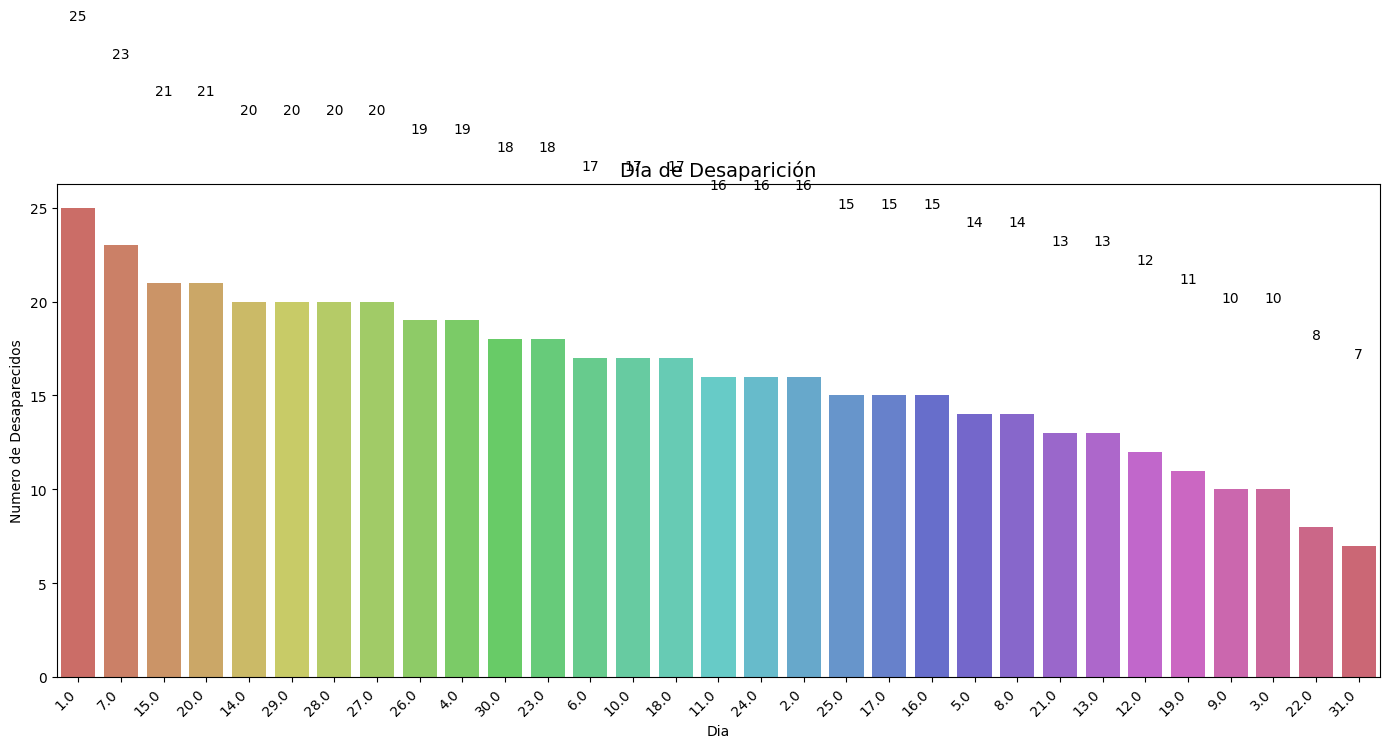

In [ ]:
grafica_df=jalisco_comun.head(500)

plt.figure(figsize=(14, 8))
ax = sns.countplot( x = 'Dia', data = grafica_df, palette = "hls", order = grafica_df['Dia'].value_counts().index)
_ = plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light'
)

plt.title('Día de Desaparición',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (grafica_df['Dia'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')


plt.tight_layout()
plt.show()

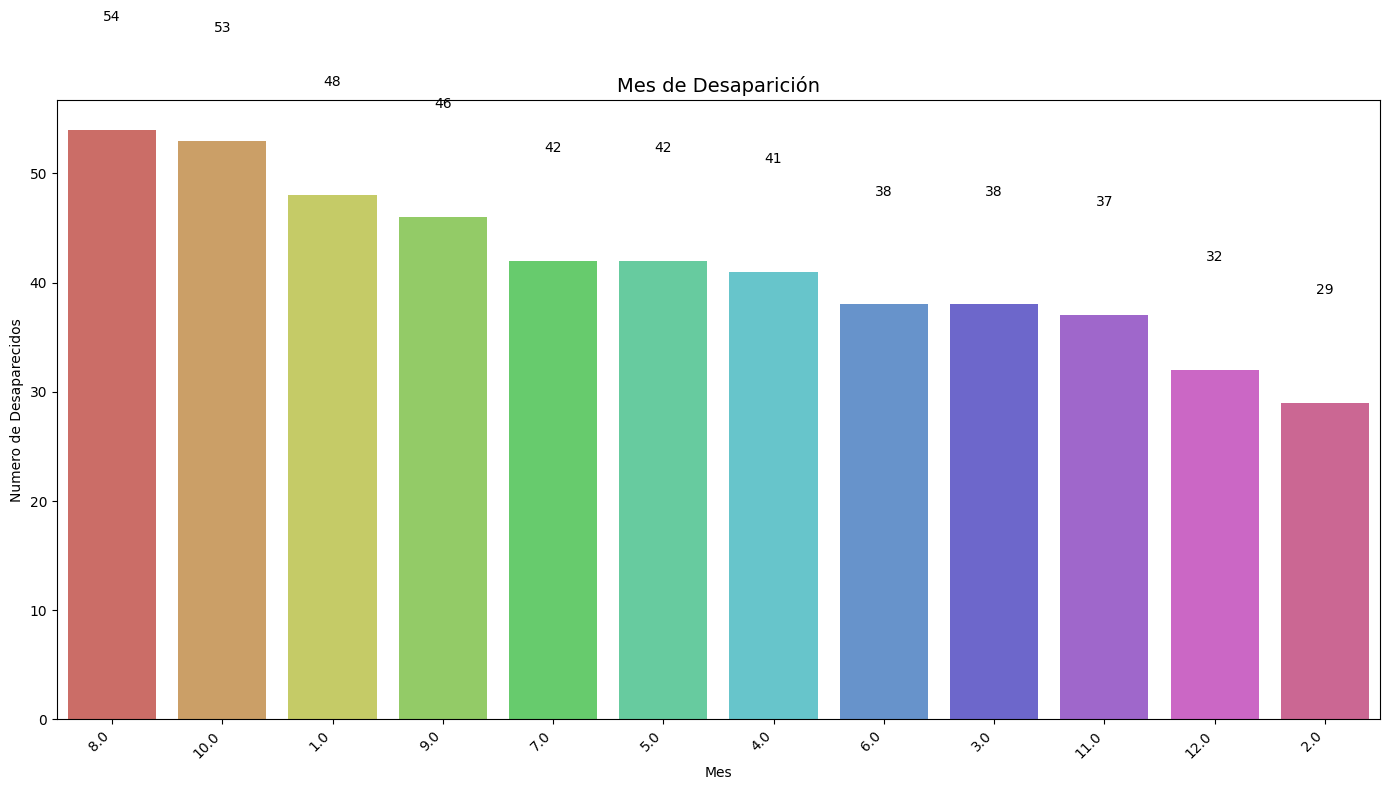

In [ ]:
grafica_df=jalisco_comun.head(500)

plt.figure(figsize=(14, 8))
ax = sns.countplot( x = 'Mes', data = grafica_df, palette = "hls", order = grafica_df['Mes'].value_counts().index)
_ = plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light'
)

plt.title('Mes de Desaparición',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (grafica_df['Mes'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')


plt.tight_layout()
plt.show()

## Se analiza el género de los desaparecidos en Jalisco

In [ ]:
def grafica(seleccionado):
    # Seleccionar el DataFrame según la opción
    if seleccionado == 'fuero federal(jalisco)':
        df = jalisco_federal
    elif seleccionado == 'fuero común(jalisco)':
        df = jalisco_comun
    elif seleccionado == 'los dos fueros(jalisco)':
        df = jalisco
    else:
        raise ValueError("No válido")
    mylabels = ["Hombres", "Mujeres"]
    colors = ['#069af3','#ffc0cb']
    plt.pie(df["Sexo"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
    plt.show()
    plt.figure(figsize=(14,10))
# Crear el botón de filtro
boton = widgets.Dropdown(
    options=['fuero federal(jalisco)', 'fuero común(jalisco)', 'los dos fueros(jalisco)'],
    value='fuero federal(jalisco)',
    description='Selecciona:'
)

# Crear la función interactiva
interact(grafica, seleccionado=boton)

interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal(jalisco)', 'fuero común(jali…

<function __main__.grafica(seleccionado)>

<Figure size 1400x1000 with 0 Axes>

## Se analizan las edades de los desaparecidos en Jalisco

In [ ]:

def grafica(seleccionado):
    # Seleccionar el DataFrame según la opción
    if seleccionado == 'fuero federal(jalisco)':
        df = jalisco_federal
    elif seleccionado == 'fuero común(jalisco)':
        df = jalisco_comun
    elif seleccionado == 'los dos fueros(jalisco)':
        df = jalisco
    else:
        raise ValueError("No válido")
    #Cuántos hay de cada edad a partir de los 0 años
    # set plot size
    plt.figure(figsize=(15, 3))

    # plot a univariate distribution of Age observations
    sns.distplot(df[(df["Edad"] > 0)].Edad, kde_kws={"lw": 3}, bins = 100)

    # set titles and labels
    plt.title('Distribuciones de edades de desaparecidos',fontsize= 14)
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    # clean layout
    plt.tight_layout()
    plt.show()
# Crear el botón de filtro
boton = widgets.Dropdown(
    options=['fuero federal(jalisco)', 'fuero común(jalisco)', 'los dos fueros(jalisco)'],
    value='fuero federal(jalisco)',
    description='Selecciona:'
)

# Crear la función interactiva
interact(grafica, seleccionado=boton)

interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal(jalisco)', 'fuero común(jali…

<function __main__.grafica(seleccionado)>

In [ ]:
dataframes = [jalisco_federal,jalisco_comun,jalisco]
# Iterar sobre cada DataFrame en la lista
for df in dataframes:
    # Verificar y convertir en NaN para cada columna
    age_distr=pd.DataFrame(df["Edad"].describe())
    display(age_distr.transpose())

,count,mean,std,min,25%,50%,75%,max
Edad,18.0,33.611111,8.806007,23.0,25.25,34.5,39.75,50.0


,count,mean,std,min,25%,50%,75%,max
Edad,3328.0,33.528846,12.79135,1.0,24.0,32.0,41.0,94.0


,count,mean,std,min,25%,50%,75%,max
Edad,3346.0,33.529289,12.772327,1.0,24.0,32.0,41.0,94.0


In [ ]:
def grafica(seleccionado):
    # Seleccionar el DataFrame según la opción
    if seleccionado == 'fuero federal(jalisco)':
        df = jalisco_federal
    elif seleccionado == 'fuero común(jalisco)':
        df = jalisco_comun
    elif seleccionado == 'los dos fueros(jalisco)':
        df = jalisco
    else:
        raise ValueError("No válido")
    grafica = df[{'Sexo','Edad'}]
    mujeres = grafica.loc[df['Sexo']=='MUJER']
    hombres = grafica.loc[df['Sexo']=='HOMBRE']
    plt.hist(mujeres['Edad'],bins=50,color='pink',alpha=1)
    plt.hist(hombres['Edad'],bins=50,color='lightblue',alpha=0.6)

    plt.xlabel("Edad")
    plt.ylabel("Desaparecidos")
    plt.title("Mujeres y Hombres Desaparecidos por Edad",weight="bold")

    plt.show()
    plt.figure(figsize=(14,10))
# Crear el botón de filtro
boton = widgets.Dropdown(
    options=['fuero federal(jalisco)', 'fuero común(jalisco)', 'los dos fueros(jalisco)'],
    value='fuero federal(jalisco)',
    description='Selecciona:'
)

# Crear la función interactiva
interact(grafica, seleccionado=boton)

interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal(jalisco)', 'fuero común(jali…

<function __main__.grafica(seleccionado)>

<Figure size 1400x1000 with 0 Axes>

In [ ]:
jalisco=jalisco.drop(['Edad'], axis=1) #Ya existe una columna que dice el rango de edad

## Se analizan las alturas, solo se puede para fuero común

<ipython-input-42-380da4eb7438>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jalisco_comun[(jalisco_comun["Estatura"] > 0)].Estatura, kde_kws={"lw": 3}, bins = 100)


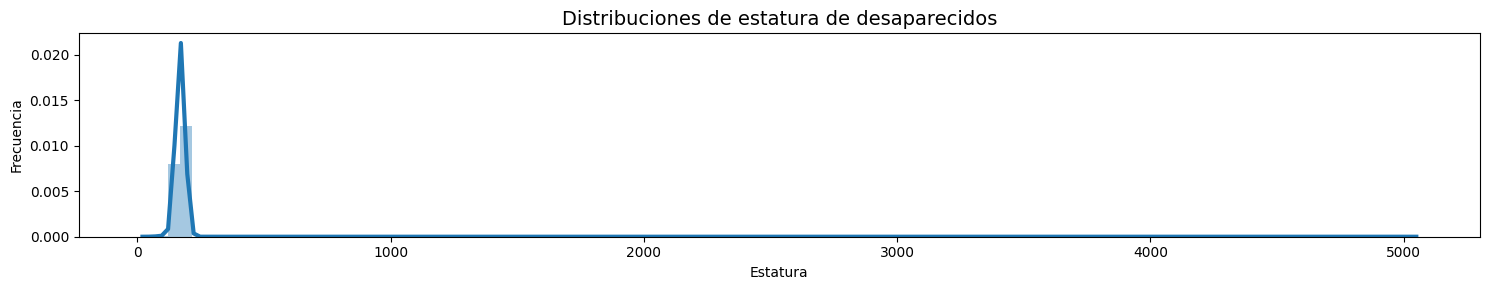

In [ ]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations
sns.distplot(jalisco_comun[(jalisco_comun["Estatura"] > 0)].Estatura, kde_kws={"lw": 3}, bins = 100)

# set titles and labels
plt.title('Distribuciones de estatura de desaparecidos',fontsize= 14)
plt.xlabel('Estatura')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

Se nota que hay un error en los datos por lo que analizamos ya que aparece que hay personas de 50 mts

In [ ]:
height_distr=pd.DataFrame(jalisco_comun["Estatura"].describe())
height_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Estatura,3362.0,170.508244,83.899779,70.0,165.0,170.0,175.0,5000.0


In [ ]:
jalisco_comun[(jalisco_comun['Estatura']<100) | (jalisco_comun['Estatura']>220)]

,Unnamed: 0,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,...,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,fuero,Fecha_hora,Rango de Edad,Dia,Mes,Año
12257,12258,29/07/2013,03:45:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,80.0,MEDIANA,...,LUNAR NEGRO EN CADA PIERNA DE APROXIMADAMENTE ...,NaN,NINGUNO,FGE - JALISCO,1,2013-07-29 03:45:00,5-9,29.0,7.0,2013.0
12536,12537,27/08/2013,08:00:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,70.0,ROBUSTA,...,LUNAR EN PIE IZQUIERDO COLOR CAFE CLARO,NaN,NINGUNO,FGE - JALISCO,1,2013-08-27 08:00:00,10-14,27.0,8.0,2013.0
13507,13508,20/10/2013,10:00:00,MEXICO,JALISCO,TLAJOMULCO DE ZUÑIGA,TLAJOMULCO DE ZUÑIGA,MEXICANA,95.0,ROBUSTA,...,NaN,NaN,NINGUNO,FGE - JALISCO,1,2013-10-20 10:00:00,0-4,20.0,10.0,2013.0
13538,13539,06/10/2013,03:00:00,MEXICO,JALISCO,EL SALTO,EL SALTO,MEXICANA,70.0,DELGADA,...,NaN,NaN,NINGUNO,FGE - JALISCO,1,2013-10-06 03:00:00,5-9,6.0,10.0,2013.0
35061,35062,05/11/2017,12:00:00,MEXICO,JALISCO,LAGOS DE MORENO,LAGOS DE MORENO,MEXICANA,5000.0,DELGADA,...,"LUNAR REDONDO EN GLUTEO EN COLOR CAFE, CICATRI...",NaN,NINGUNO,FGE - JALISCO,1,2017-11-05 12:00:00,0-4,5.0,11.0,2017.0


Se confirma que el dataframe contiene un dato que dice que hay una persona de 50 mts pero también se descubre que hay dos personas de 70 cm. Asimismo, podemos encontrar a personas de 80 y 95 cm.  

In [ ]:
jalisco_comun.loc[jalisco_comun["Estatura"]==70,'Estatura']=170 #Se asume que solamente se pusieron los centímetros de la persona y no el metro, por lo que se cambia a 170 cm
jalisco_comun.loc[jalisco_comun["Estatura"]==80,'Estatura']=180 #Se asume que solamente se pusieron los centímetros de la persona y no el metro, por lo que se cambia a 180 cm
jalisco_comun.loc[jalisco_comun["Estatura"]==95,'Estatura']=195 #Se asume que solamente se pusieron los centímetros de la persona y no el metro, por lo que se cambia a 195 cm
jalisco_comun.loc[jalisco_comun["Estatura"]==5000,'Estatura']=jalisco_comun["Estatura"].mean() #Debido a que es más difícil asumir por qué se escribió que la persona medía 50 mts, se cambia el valor por el promedio de estaturas

In [ ]:
#Se checa si se realizaron los cambios correctamente
height_distr=pd.DataFrame(jalisco_comun["Estatura"].describe())
height_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Estatura,3362.0,169.190762,9.37543,100.0,165.0,170.0,175.0,200.0


<ipython-input-47-6ddebb5811c8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jalisco_comun[(jalisco_comun["Estatura"] > 0)].Estatura, kde_kws={"lw": 3}, bins = 50)


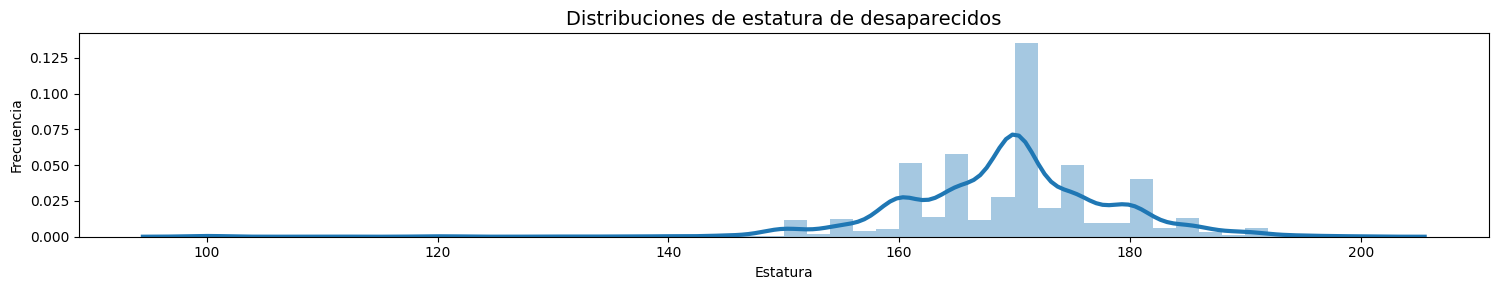

In [ ]:
#Se vuelve a graficar la distribución de estaturas con los datos cambiados
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations
sns.distplot(jalisco_comun[(jalisco_comun["Estatura"] > 0)].Estatura, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distribuciones de estatura de desaparecidos',fontsize= 14)
plt.xlabel('Estatura')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

## Se analizan las nacionalidades

In [ ]:
dataframes = [jalisco_federal,jalisco_comun,jalisco]
# Iterar sobre cada DataFrame en la lista
for df in dataframes:
    # Verificar y convertir en NaN para cada columna
    #Se observan qué nacionalidades hay en Jalisco
    display(df['Nacionalidad'].value_counts())

MÉXICO         21
COLOMBIA        2
HONDURAS        1
EL SALVADOR     1
GUATEMALA       1
Name: Nacionalidad, dtype: int64

MEXICANA          3340
ESTADOUNIDENSE       8
COLOMBIANA           3
ITALIANA             3
CANADIENSE           2
CUBANA               1
ESPAÑOLA             1
GUATEMALTECO         1
HONDUREÑA            1
VENEZOLANA           1
SALVADOREÑA          1
Name: Nacionalidad, dtype: int64

MEXICANA          3340
MÉXICO              21
ESTADOUNIDENSE       8
COLOMBIANA           3
ITALIANA             3
CANADIENSE           2
COLOMBIA             2
CUBANA               1
ESPAÑOLA             1
GUATEMALTECO         1
HONDUREÑA            1
VENEZOLANA           1
SALVADOREÑA          1
HONDURAS             1
EL SALVADOR          1
GUATEMALA            1
Name: Nacionalidad, dtype: int64

In [ ]:
def grafica(seleccionado):
    # Seleccionar el DataFrame según la opción
    if seleccionado == 'fuero federal(jalisco)':
        df = jalisco_federal
    elif seleccionado == 'fuero común(jalisco)':
        df = jalisco_comun
    elif seleccionado == 'los dos fueros(jalisco)':
        df = jalisco
    else:
        raise ValueError("No válido")
    #Se grafican las nacionalidades para ver gráficamente lo anterior

    plt.figure(figsize=(6, 5))
    ax = sns.countplot( x = 'Nacionalidad', data = df, palette = "hls", order = df['Nacionalidad'].value_counts().index)
    _ = plt.xticks(
        rotation=45,
        horizontalalignment='right',
        fontweight='light'
    )

    plt.title('Nacionalidad de Desaparecido',fontsize= 14)
    plt.ylabel('Numero de Desaparecidos')

    # calculate passengers for each category
    labels = (df['Nacionalidad'].value_counts())
    # add result numbers on barchart
    for i, v in enumerate(labels):
        ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')


    plt.tight_layout()
    plt.show()


# Crear el botón de filtro
boton = widgets.Dropdown(
    options=['fuero federal(jalisco)', 'fuero común(jalisco)', 'los dos fueros(jalisco)'],
    value='fuero federal(jalisco)',
    description='Selecciona:'
)

# Crear la función interactiva
interact(grafica, seleccionado=boton)

interactive(children=(Dropdown(description='Selecciona:', options=('fuero federal(jalisco)', 'fuero común(jali…

<function __main__.grafica(seleccionado)>

In [ ]:


dataframes = [jalisco_federal,jalisco_comun,jalisco]
# Iterar sobre cada DataFrame en la lista
for df in dataframes:
    # Verificar y convertir en NaN para cada columna
    #Se observan qué nacionalidades hay en Jalisco
    #¿Los extranjeros solamente desaparecen en los cinco principales destinos
    #turísticos de Jalisco (Chapala, Cihuatlán,Guadalajara,Puerto Vallarta y San Juan de los Lagos)?
    extranjeros = jalisco[(jalisco['Nacionalidad'] != 'MEXICANA') &
                                  ((jalisco['Municipio'] == 'PUERTO VALLARTA') |
                                  (jalisco['Municipio'] == 'GUADALAJARA') |
                                  (jalisco['Municipio'] == 'CHAPALA') |
                                  (jalisco['Municipio'] == 'SAN JUAN DE LOS LAGOS')|
                                  (jalisco['Municipio'] == 'CIHUATLAN'))]
    display(extranjeros)

,Unnamed: 0,Fecha,Pais,Entidad,Municipio,Nacionalidad,Sexo,fuero,Rango de Edad
4734,4735,29/11/2010,MEXICO,JALISCO,GUADALAJARA,CUBANA,MUJER,1,20-24
4825,4826,09/09/2011,MEXICO,JALISCO,CHAPALA,ESTADOUNIDENSE,HOMBRE,1,65-69
12034,12035,08/05/2013,MEXICO,JALISCO,PUERTO VALLARTA,ESTADOUNIDENSE,HOMBRE,1,30-34
12035,12036,08/05/2013,MEXICO,JALISCO,PUERTO VALLARTA,CANADIENSE,HOMBRE,1,20-24
24218,24219,16/03/2016,MEXICO,JALISCO,PUERTO VALLARTA,CANADIENSE,HOMBRE,1,30-34
24257,24258,21/03/2016,MEXICO,JALISCO,GUADALAJARA,ESTADOUNIDENSE,HOMBRE,1,30-34
29594,29595,06/02/2017,MEXICO,JALISCO,GUADALAJARA,VENEZOLANA,MUJER,1,25-29
30456,30457,29/03/2017,MEXICO,JALISCO,GUADALAJARA,ITALIANA,HOMBRE,1,55-59
36413,149,25/12/2014,MÉXICO,JALISCO,GUADALAJARA,COLOMBIA,HOMBRE,2,40-44
36628,364,01/12/1987,MÉXICO,JALISCO,GUADALAJARA,HONDURAS,HOMBRE,2,45-49


,Unnamed: 0,Fecha,Pais,Entidad,Municipio,Nacionalidad,Sexo,fuero,Rango de Edad
4734,4735,29/11/2010,MEXICO,JALISCO,GUADALAJARA,CUBANA,MUJER,1,20-24
4825,4826,09/09/2011,MEXICO,JALISCO,CHAPALA,ESTADOUNIDENSE,HOMBRE,1,65-69
12034,12035,08/05/2013,MEXICO,JALISCO,PUERTO VALLARTA,ESTADOUNIDENSE,HOMBRE,1,30-34
12035,12036,08/05/2013,MEXICO,JALISCO,PUERTO VALLARTA,CANADIENSE,HOMBRE,1,20-24
24218,24219,16/03/2016,MEXICO,JALISCO,PUERTO VALLARTA,CANADIENSE,HOMBRE,1,30-34
24257,24258,21/03/2016,MEXICO,JALISCO,GUADALAJARA,ESTADOUNIDENSE,HOMBRE,1,30-34
29594,29595,06/02/2017,MEXICO,JALISCO,GUADALAJARA,VENEZOLANA,MUJER,1,25-29
30456,30457,29/03/2017,MEXICO,JALISCO,GUADALAJARA,ITALIANA,HOMBRE,1,55-59
36413,149,25/12/2014,MÉXICO,JALISCO,GUADALAJARA,COLOMBIA,HOMBRE,2,40-44
36628,364,01/12/1987,MÉXICO,JALISCO,GUADALAJARA,HONDURAS,HOMBRE,2,45-49


,Unnamed: 0,Fecha,Pais,Entidad,Municipio,Nacionalidad,Sexo,fuero,Rango de Edad
4734,4735,29/11/2010,MEXICO,JALISCO,GUADALAJARA,CUBANA,MUJER,1,20-24
4825,4826,09/09/2011,MEXICO,JALISCO,CHAPALA,ESTADOUNIDENSE,HOMBRE,1,65-69
12034,12035,08/05/2013,MEXICO,JALISCO,PUERTO VALLARTA,ESTADOUNIDENSE,HOMBRE,1,30-34
12035,12036,08/05/2013,MEXICO,JALISCO,PUERTO VALLARTA,CANADIENSE,HOMBRE,1,20-24
24218,24219,16/03/2016,MEXICO,JALISCO,PUERTO VALLARTA,CANADIENSE,HOMBRE,1,30-34
24257,24258,21/03/2016,MEXICO,JALISCO,GUADALAJARA,ESTADOUNIDENSE,HOMBRE,1,30-34
29594,29595,06/02/2017,MEXICO,JALISCO,GUADALAJARA,VENEZOLANA,MUJER,1,25-29
30456,30457,29/03/2017,MEXICO,JALISCO,GUADALAJARA,ITALIANA,HOMBRE,1,55-59
36413,149,25/12/2014,MÉXICO,JALISCO,GUADALAJARA,COLOMBIA,HOMBRE,2,40-44
36628,364,01/12/1987,MÉXICO,JALISCO,GUADALAJARA,HONDURAS,HOMBRE,2,45-49


## Se analiza la cantidad de mexicanos que desaparecen en zonas turísticas

In [ ]:
dataframes = [jalisco_federal,jalisco_comun,jalisco]
# Iterar sobre cada DataFrame en la lista
for df in dataframes:
    # Verificar y convertir en NaN para cada columna
    #Se analiza la cantidad de mexicanos que desaparecen en zonas turísticas para ver
    #si hay mayor incidencia de esta situación en estas
    mexicanos=df[(df['Nacionalidad'] == 'MEXICANA') &
                    ((df['Municipio'] == 'PUERTO VALLARTA') |
                      (df['Municipio'] == 'GUADALAJARA') |
                      (df['Municipio'] == 'CHAPALA') |
                      (df['Municipio'] == 'SAN JUAN DE LOS LAGOS')|
                      (df['Municipio'] == 'CIHUATLAN'))]
    display(mexicanos)

,Unnamed: 0,Fecha,Pais,Entidad,Clave de entidad,Municipio,Pais de nacimiento,Nacionalidad,Sexo,Edad,Tipo de Lugar,Autoridad que recibio la denuncia,Fecha de la denuncia,Entidad donde se recibio la denuncia,fuero,Rango de Edad


,Unnamed: 0,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,...,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,fuero,Fecha_hora,Rango de Edad,Dia,Mes,Año
1415,1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,170.0,ROBUSTA,...,NaN,NaN,NINGUNO,FGE - PUEBLA,1,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4278,4279,06/02/2012,08:00:00,MEXICO,JALISCO,CHAPALA,AJIJIC,MEXICANA,180.0,DELGADA,...,"TATUAJES QUE DICEN: LOPEZ, UNA VIRGEN Y UNO QU...",NaN,NINGUNO,FGE - JALISCO,1,2012-02-06 08:00:00,35-39,6.0,2.0,2012.0
4303,4304,14/10/2012,01:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,170.0,DELGADA,...,"BRAZO TATUADOS IZQUIERDO TRES ESTRELLAS, EL DE...",NaN,NINGUNO,FGE - JALISCO,1,2012-10-14 01:00:00,25-29,14.0,10.0,2012.0
4308,4309,26/10/2012,01:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,165.0,ROBUSTA,...,UN TATUAJE DEL SAGRADO CORAZON DE JESUS EN EL ...,NaN,NINGUNO,FGE - JALISCO,1,2012-10-26 01:00:00,45-49,26.0,10.0,2012.0
4313,4314,21/08/2010,07:30:00,MEXICO,JALISCO,PUERTO VALLARTA,PUERTO VALLARTA,MEXICANA,185.0,DELGADA,...,TIENE UN DIENTE ESTRELLADO EN EL MAXILAR SUPERIOR,NaN,NINGUNO,FGE - JALISCO,1,2010-08-21 07:30:00,25-29,21.0,8.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36013,36014,13/06/2017,02:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,175.0,DELGADA,...,PRESENTA CICATRICES EN CEJA IZQUIERDA DEL LADO...,NaN,NINGUNO,FGE - JALISCO,1,2017-06-13 02:00:00,25-29,13.0,6.0,2017.0
36037,36038,31/07/2017,08:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,170.0,DELGADA,...,"CICATRIZ EN LA BARBILLA DERECHA, TIENE VARIOS ...",NaN,NINGUNO,FGE - JALISCO,1,2017-07-31 08:00:00,20-24,31.0,7.0,2017.0
36066,36067,30/09/2017,12:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,165.0,MEDIANA,...,NaN,NaN,NINGUNO,FGE - JALISCO,1,2017-09-30 12:00:00,10-14,30.0,9.0,2017.0
36068,36069,02/10/2017,09:30:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,140.0,DELGADA,...,LUNAR EN LA BOCA DEL LADO DERECHO,NaN,NaN,FGE - JALISCO,1,2017-10-02 09:30:00,20-24,2.0,10.0,2017.0


,Unnamed: 0,Fecha,Pais,Entidad,Municipio,Nacionalidad,Sexo,fuero,Rango de Edad
1415,1416,28/07/2011,MEXICO,JALISCO,GUADALAJARA,MEXICANA,HOMBRE,1,20-24
4278,4279,06/02/2012,MEXICO,JALISCO,CHAPALA,MEXICANA,HOMBRE,1,35-39
4303,4304,14/10/2012,MEXICO,JALISCO,GUADALAJARA,MEXICANA,HOMBRE,1,25-29
4308,4309,26/10/2012,MEXICO,JALISCO,GUADALAJARA,MEXICANA,HOMBRE,1,45-49
4313,4314,21/08/2010,MEXICO,JALISCO,PUERTO VALLARTA,MEXICANA,HOMBRE,1,25-29
...,...,...,...,...,...,...,...,...,...
36013,36014,13/06/2017,MEXICO,JALISCO,GUADALAJARA,MEXICANA,HOMBRE,1,25-29
36037,36038,31/07/2017,MEXICO,JALISCO,GUADALAJARA,MEXICANA,HOMBRE,1,20-24
36066,36067,30/09/2017,MEXICO,JALISCO,GUADALAJARA,MEXICANA,MUJER,1,10-14
36068,36069,02/10/2017,MEXICO,JALISCO,GUADALAJARA,MEXICANA,MUJER,1,20-24


In [ ]:

dataframes = [jalisco_federal,jalisco_comun,jalisco]
# Iterar sobre cada DataFrame en la lista
for df in dataframes:
    #Se divide los extranjeros desaparecidos en zonas turísticas sobre el total de extranjeros desaparecidos
    display((len(extranjeros)/len(df[df['Nacionalidad']!='MEXICANA']))*100)

50.0

59.09090909090909

27.083333333333332

In [ ]:

dataframes = [jalisco_federal,jalisco_comun,jalisco]
# Iterar sobre cada DataFrame en la lista
for df in dataframes:
    #Se divide la cantidad de extranjeros desaparecidos en zonas turísticas entre la cantidad de personas de todas las nacionalidades desaparecidas en zonas turísticas
    display((len(extranjeros)/len(pd.concat([extranjeros,mexicanos],axis=0)))*100)

1.4891179839633446

1.4891179839633446

1.4891179839633446

In [ ]:
dataframes = [jalisco_federal,jalisco_comun,jalisco]
# Iterar sobre cada DataFrame en la lista
for df in dataframes:
    #Se analiza qué porcentaje de personas desaparecieron en las zonas turísticas de Jalisco
    display((len(pd.concat([extranjeros,mexicanos],axis=0))/len(df))*100)


3357.692307692308

25.966686496133256

25.767414403778037

In [ ]:
#convertimos a csv
jalisco.to_csv('jalisco.csv', index=False)

# Descargar el archivo
files.download('jalisco.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#convertimos a csv
jalisco_comun.to_csv('jalisco_comun.csv', index=False)

# Descargar el archivo
files.download('jalisco_comun.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#convertimos a csv
fuero.to_csv('fuero.csv', index=False)

# Descargar el archivo
files.download('fuero.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Divide los datos en dos grupos según el fuero
grupo_A = fuero[fuero['fuero'] == 1]['Edad']
grupo_B = fuero[fuero['fuero'] == 2]['Edad']

# Realiza la prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(grupo_A, grupo_B)

# Imprime los resultados
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Interpreta los resultados
if p_value < 0.05:
    print('Hay evidencia significativa para rechazar la hipótesis nula.')
    print('Al rechazar la hipotesis nula, vemos que las medias de edad son muy diferentes, por lo que es posible asumir que hay un sesgo importante en relación a las investigaciones de cada autoridad')
else:
    print('No hay suficiente evidencia para rechazar la hipótesis nula.')

T-Statistic: 2.318922272538769
P-Value: 0.020404607784729356
Hay evidencia significativa para rechazar la hipótesis nula.
Al rechazar la hipotesis nula, vemos que las medias de edad son muy diferentes, por lo que es posible asumir que hay un sesgo importante en relación a las investigaciones de cada autoridad


In [ ]:
analisis=fuero
analisis['Sexo'] = analisis['Sexo'].replace({'MUJER': 1, 'HOMBRE': 2})
analisis

<ipython-input-59-4520bb18c8b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analisis['Sexo'] = analisis['Sexo'].replace({'MUJER': 1, 'HOMBRE': 2})


,Unnamed: 0,Fecha,Pais,Entidad,Municipio,Nacionalidad,Sexo,Edad,fuero
0,1,18/03/2012,MEXICO,SONORA,NAVOJOA,MEXICANA,1,7.000000,1
1,2,05/02/2007,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,MEXICANA,1,4.000000,1
2,3,14/03/2009,MEXICO,ESTADO DE MEXICO,CHALCO,MEXICANA,2,6.000000,1
3,4,23/12/2006,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,MEXICANA,2,10.000000,1
4,5,11/01/2008,MEXICO,ESTADO DE MEXICO,TOLUCA,MEXICANA,2,4.000000,1
...,...,...,...,...,...,...,...,...,...
37430,1166,14/12/2012,MÉXICO,JALISCO,LA BARCA,MÉXICO,2,41.000000,2
37431,1167,07/11/2017,MÉXICO,TAMAULIPAS,NUEVO LAREDO,MÉXICO,2,32.000000,2
37432,1168,28/01/2015,MÉXICO,CIUDAD DE MÉXICO,VENUSTIANO CARRANZA,GUATEMALA,2,52.000000,2
37433,1169,05/11/2011,MÉXICO,VERACRUZ DE IGNACIO DE LA LLAVE,BANDERILLA,MÉXICO,2,30.768054,2


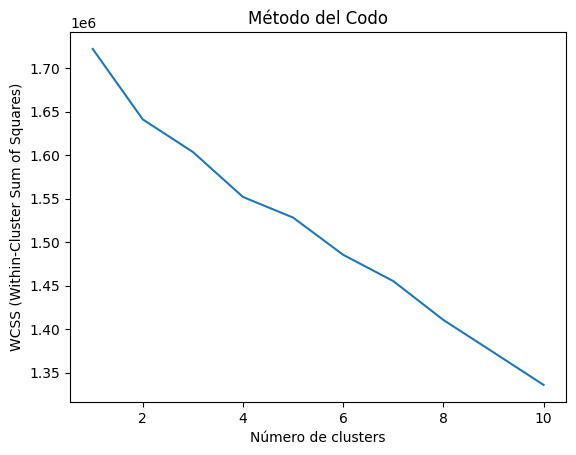

           Unnamed: 0      Sexo       Edad     fuero
cluster                                             
0        15360.184532  1.894166  32.150084  1.011307
1        19895.493217  1.000000  24.388516  1.019918
2        16946.621337  2.000000  32.934829  1.037014


<ipython-input-63-670d59cd69e8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analisis['cluster'] = kmeans.fit_predict(X_scaled)
<ipython-input-63-670d59cd69e8>:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = analisis.groupby('cluster').mean()


In [ ]:
X = analisis[['Edad', 'Sexo', 'fuero', 'Entidad']]

X = pd.get_dummies(X, columns=['Entidad', 'Sexo'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
analisis['cluster'] = kmeans.fit_predict(X_scaled)

cluster_analysis = analisis.groupby('cluster').mean()
print(cluster_analysis)


La interpretación anterior nos estaría diciendo que las personas con mayor probabilidad de desaparecer, son hombres (2) entre las edades de 24-32. Sin embargo no se considera obviamente los no reportados o los que reportan y no se les registra en la base de datos, esto es más común en mujeres, ya que lamentablemente, los responsables de estas desapa